In [48]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
%matplotlib inline

Убедимся в том, что всё так происходит на самом деле. 
  
  
- Скачайте **тренировочный датасэт** с ирисами, обучите деревья с глубиной от 1 до 100. 
  
    
- Целевой переменной при обучении является переменная species. 


- При этом записывайте его скор (DecisionTreeClassifier.score()) на тренировочных данных, и аккуратность предсказаний (accuracy_score) на **тестовом датасэте**. 


- Затем визуализируйте зависимость скора и аккуратности предсказаний от глубины дерева и выберите правильную визуализацию из предложенных.


Важно: задайте random seed прямо перед созданием дерева или укажите его в параметрах дерева (random_state=0)

In [31]:
data_train = pd.read_csv("../data/train_iris.csv", index_col=0)
data_train.shape

(100, 5)

In [16]:
X_train = data_train[data_train.columns[:-1]]
y_train = data_train.species
X_train.head()

,sepal length,sepal width,petal length,petal width
130,7.4,2.8,6.1,1.9
7,5.0,3.4,1.5,0.2
11,4.8,3.4,1.6,0.2
142,5.8,2.7,5.1,1.9
109,7.2,3.6,6.1,2.5


In [18]:
data_test = pd.read_csv("../data/test_iris.csv", index_col=0)
data_test.head()

,sepal length,sepal width,petal length,petal width,species
114,5.8,2.8,5.1,2.4,2
70,5.9,3.2,4.8,1.8,1
138,6.0,3.0,4.8,1.8,2
59,5.2,2.7,3.9,1.4,1
44,5.1,3.8,1.9,0.4,0


In [19]:
X_test = data_test[data_test.columns[:-1]]
y_test = data_test.species
X_test.head()

,sepal length,sepal width,petal length,petal width
114,5.8,2.8,5.1,2.4
70,5.9,3.2,4.8,1.8
138,6.0,3.0,4.8,1.8
59,5.2,2.7,3.9,1.4
44,5.1,3.8,1.9,0.4


In [20]:
np.random.seed(0)
train_score = list()
test_score = list()
for depth in range(1, 101):
    cls = DecisionTreeClassifier(max_depth=depth)
    cls.fit(X_train, y_train)
    
    train = cls.score(X_train, y_train)
    test = cls.score(X_test, y_test)
    
    train_score.append(train)
    test_score.append(test)
    

In [53]:
data= pd.DataFrame(
    {
        "train_score": train_score,
        "test_score": test_score
    },
    index=range(1, 101)
)
data.head()

,train_score,test_score
1,0.70,0.60
2,0.97,0.94
3,0.99,0.94
4,1.00,0.92
5,1.00,0.92


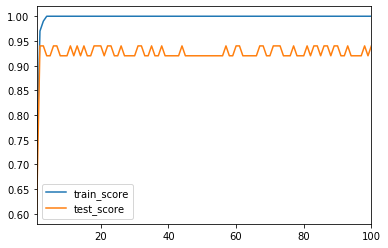

In [54]:
data.plot()

___
___

Мы собрали побольше данных о котиках и собачках, и готовы обучить нашего робота их классифицировать! Скачайте тренировочный датасэт и  обучите на нём Decision Tree. После этого скачайте датасэт из задания и предскажите какие наблюдения к кому относятся. Введите число собачек в вашем датасэте.

В задании допускается определённая погрешность.

P. S.: данные в задании находятся в формате json, используйте метод pd.read_json для их прочтения

In [58]:
data = pd.read_csv("../data/dogs_n_cats.csv")
data.head()
X_test = data.iloc[:, :-1]
y_test = data.iloc[:, -1]

In [60]:
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_test, y_test)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [73]:
data = pd.read_json("../data/dataset_209691_15.txt")
data.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,34,40.8,1,1,0
1,19,22.8,1,1,0
2,17,20.4,1,0,0
3,24,28.8,1,1,0
4,34,40.8,1,1,0


In [74]:
y = clf.predict(data)
y[y == "собачка"].shape[0]

56

48